In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv(r'../data/WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv',low_memory=False)

In [13]:
df.columns

Index([u'user_name', u'raw_timestamp_part_1', u'raw_timestamp_part_2',
       u'cvtd_timestamp', u'new_window', u'num_window', u'roll_belt',
       u'pitch_belt', u'yaw_belt', u'total_accel_belt',
       ...
       u'gyros_forearm_x', u'gyros_forearm_y', u'gyros_forearm_z',
       u'accel_forearm_x', u'accel_forearm_y', u'accel_forearm_z',
       u'magnet_forearm_x', u'magnet_forearm_y', u'magnet_forearm_z',
       u'classe'],
      dtype='object', length=159)

In [16]:
df[['user_name','raw_timestamp_part_1','raw_timestamp_part_2','cvtd_timestamp','new_window','num_window']].head(10)

,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window
0,eurico,1322489729,34670,28/11/2011 14:15,no,1
1,eurico,1322489729,62641,28/11/2011 14:15,no,1
2,eurico,1322489729,70653,28/11/2011 14:15,no,1
3,eurico,1322489729,82654,28/11/2011 14:15,no,1
4,eurico,1322489729,90637,28/11/2011 14:15,no,1
5,eurico,1322489729,170626,28/11/2011 14:15,no,1
6,eurico,1322489729,190665,28/11/2011 14:15,no,1
7,eurico,1322489729,242723,28/11/2011 14:15,no,1
8,eurico,1322489729,267551,28/11/2011 14:15,no,1
9,eurico,1322489729,274689,28/11/2011 14:15,no,1


In [4]:
df = df.drop(['user_name','raw_timestamp_part_1','raw_timestamp_part_2','cvtd_timestamp','new_window','num_window'],axis=1)

In [5]:
df.head()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,kurtosis_roll_belt,kurtosis_picth_belt,kurtosis_yaw_belt,skewness_roll_belt,skewness_roll_belt.1,skewness_yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,3.70,41.6,-82.8,3,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.05,-0.37,-0.43,-170.0,155.0,184,-1160.0,1400.0,-876.0,E
1,3.66,42.8,-82.5,2,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.06,-0.37,-0.59,-178.0,164.0,182,-1150.0,1410.0,-871.0,E
2,3.58,43.7,-82.3,1,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.05,-0.27,-0.72,-182.0,172.0,185,-1130.0,1400.0,-863.0,E
3,3.56,44.4,-82.1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,-0.24,-0.79,-185.0,182.0,188,-1120.0,1400.0,-855.0,E
4,3.57,45.1,-81.9,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.08,-0.27,-0.82,-188.0,195.0,188,-1100.0,1400.0,-843.0,E


In [17]:
no_of_rows = len(df)
threshold = no_of_rows * 0.05
print no_of_rows, threshold

39242 1962.1


In [19]:
drop_cols = []
for column in df:
    temp_no_rows = df[column].count()
    if column != 'classe' and temp_no_rows < threshold:
        print column, df[column].count()
        drop_cols.append(column)

kurtosis_roll_belt 839
kurtosis_picth_belt 839
kurtosis_yaw_belt 839
skewness_roll_belt 839
skewness_roll_belt.1 839
skewness_yaw_belt 839
max_roll_belt 839
max_picth_belt 839
max_yaw_belt 839
min_roll_belt 839
min_pitch_belt 839
min_yaw_belt 839
amplitude_roll_belt 839
amplitude_pitch_belt 839
amplitude_yaw_belt 839
var_total_accel_belt 839
avg_roll_belt 840
stddev_roll_belt 839
var_roll_belt 839
avg_pitch_belt 839
stddev_pitch_belt 839
var_pitch_belt 839
avg_yaw_belt 839
stddev_yaw_belt 839
var_yaw_belt 839
var_accel_arm 839
avg_roll_arm 839
stddev_roll_arm 839
var_roll_arm 839
avg_pitch_arm 839
stddev_pitch_arm 839
var_pitch_arm 839
avg_yaw_arm 839
stddev_yaw_arm 839
var_yaw_arm 839
kurtosis_roll_arm 839
kurtosis_picth_arm 839
kurtosis_yaw_arm 839
skewness_roll_arm 839
skewness_pitch_arm 839
skewness_yaw_arm 839
max_roll_arm 839
max_picth_arm 839
max_yaw_arm 839
min_roll_arm 839
min_pitch_arm 839
min_yaw_arm 839
amplitude_roll_arm 839
amplitude_pitch_arm 839
amplitude_yaw_arm 839
ku

In [8]:
df.drop(drop_cols,axis=1,inplace=True)

In [9]:
df.head()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,3.70,41.6,-82.8,3,2.02,0.18,0.02,-3,-18,22,...,-0.05,-0.37,-0.43,-170.0,155.0,184,-1160.0,1400.0,-876.0,E
1,3.66,42.8,-82.5,2,1.96,0.14,0.05,-2,-13,16,...,-0.06,-0.37,-0.59,-178.0,164.0,182,-1150.0,1410.0,-871.0,E
2,3.58,43.7,-82.3,1,1.88,0.08,0.05,-2,-6,8,...,-0.05,-0.27,-0.72,-182.0,172.0,185,-1130.0,1400.0,-863.0,E
3,3.56,44.4,-82.1,1,1.80,0.03,0.08,-6,-5,7,...,0.02,-0.24,-0.79,-185.0,182.0,188,-1120.0,1400.0,-855.0,E
4,3.57,45.1,-81.9,1,1.77,0.00,0.13,-4,-9,0,...,0.08,-0.27,-0.82,-188.0,195.0,188,-1100.0,1400.0,-843.0,E


In [10]:
df.to_csv('../data/har_processed_hdr.csv',index=False)

In [21]:
import seaborn as sns

In [23]:
sns.set(style='whitegrid',context='notebook')

In [27]:
cols = ['roll_belt','pitch_belt','yaw_belt','total_accel_belt','gyros_belt_x','gyros_belt_y','gyros_belt_z','accel_belt_x','accel_belt_y','accel_belt_z']

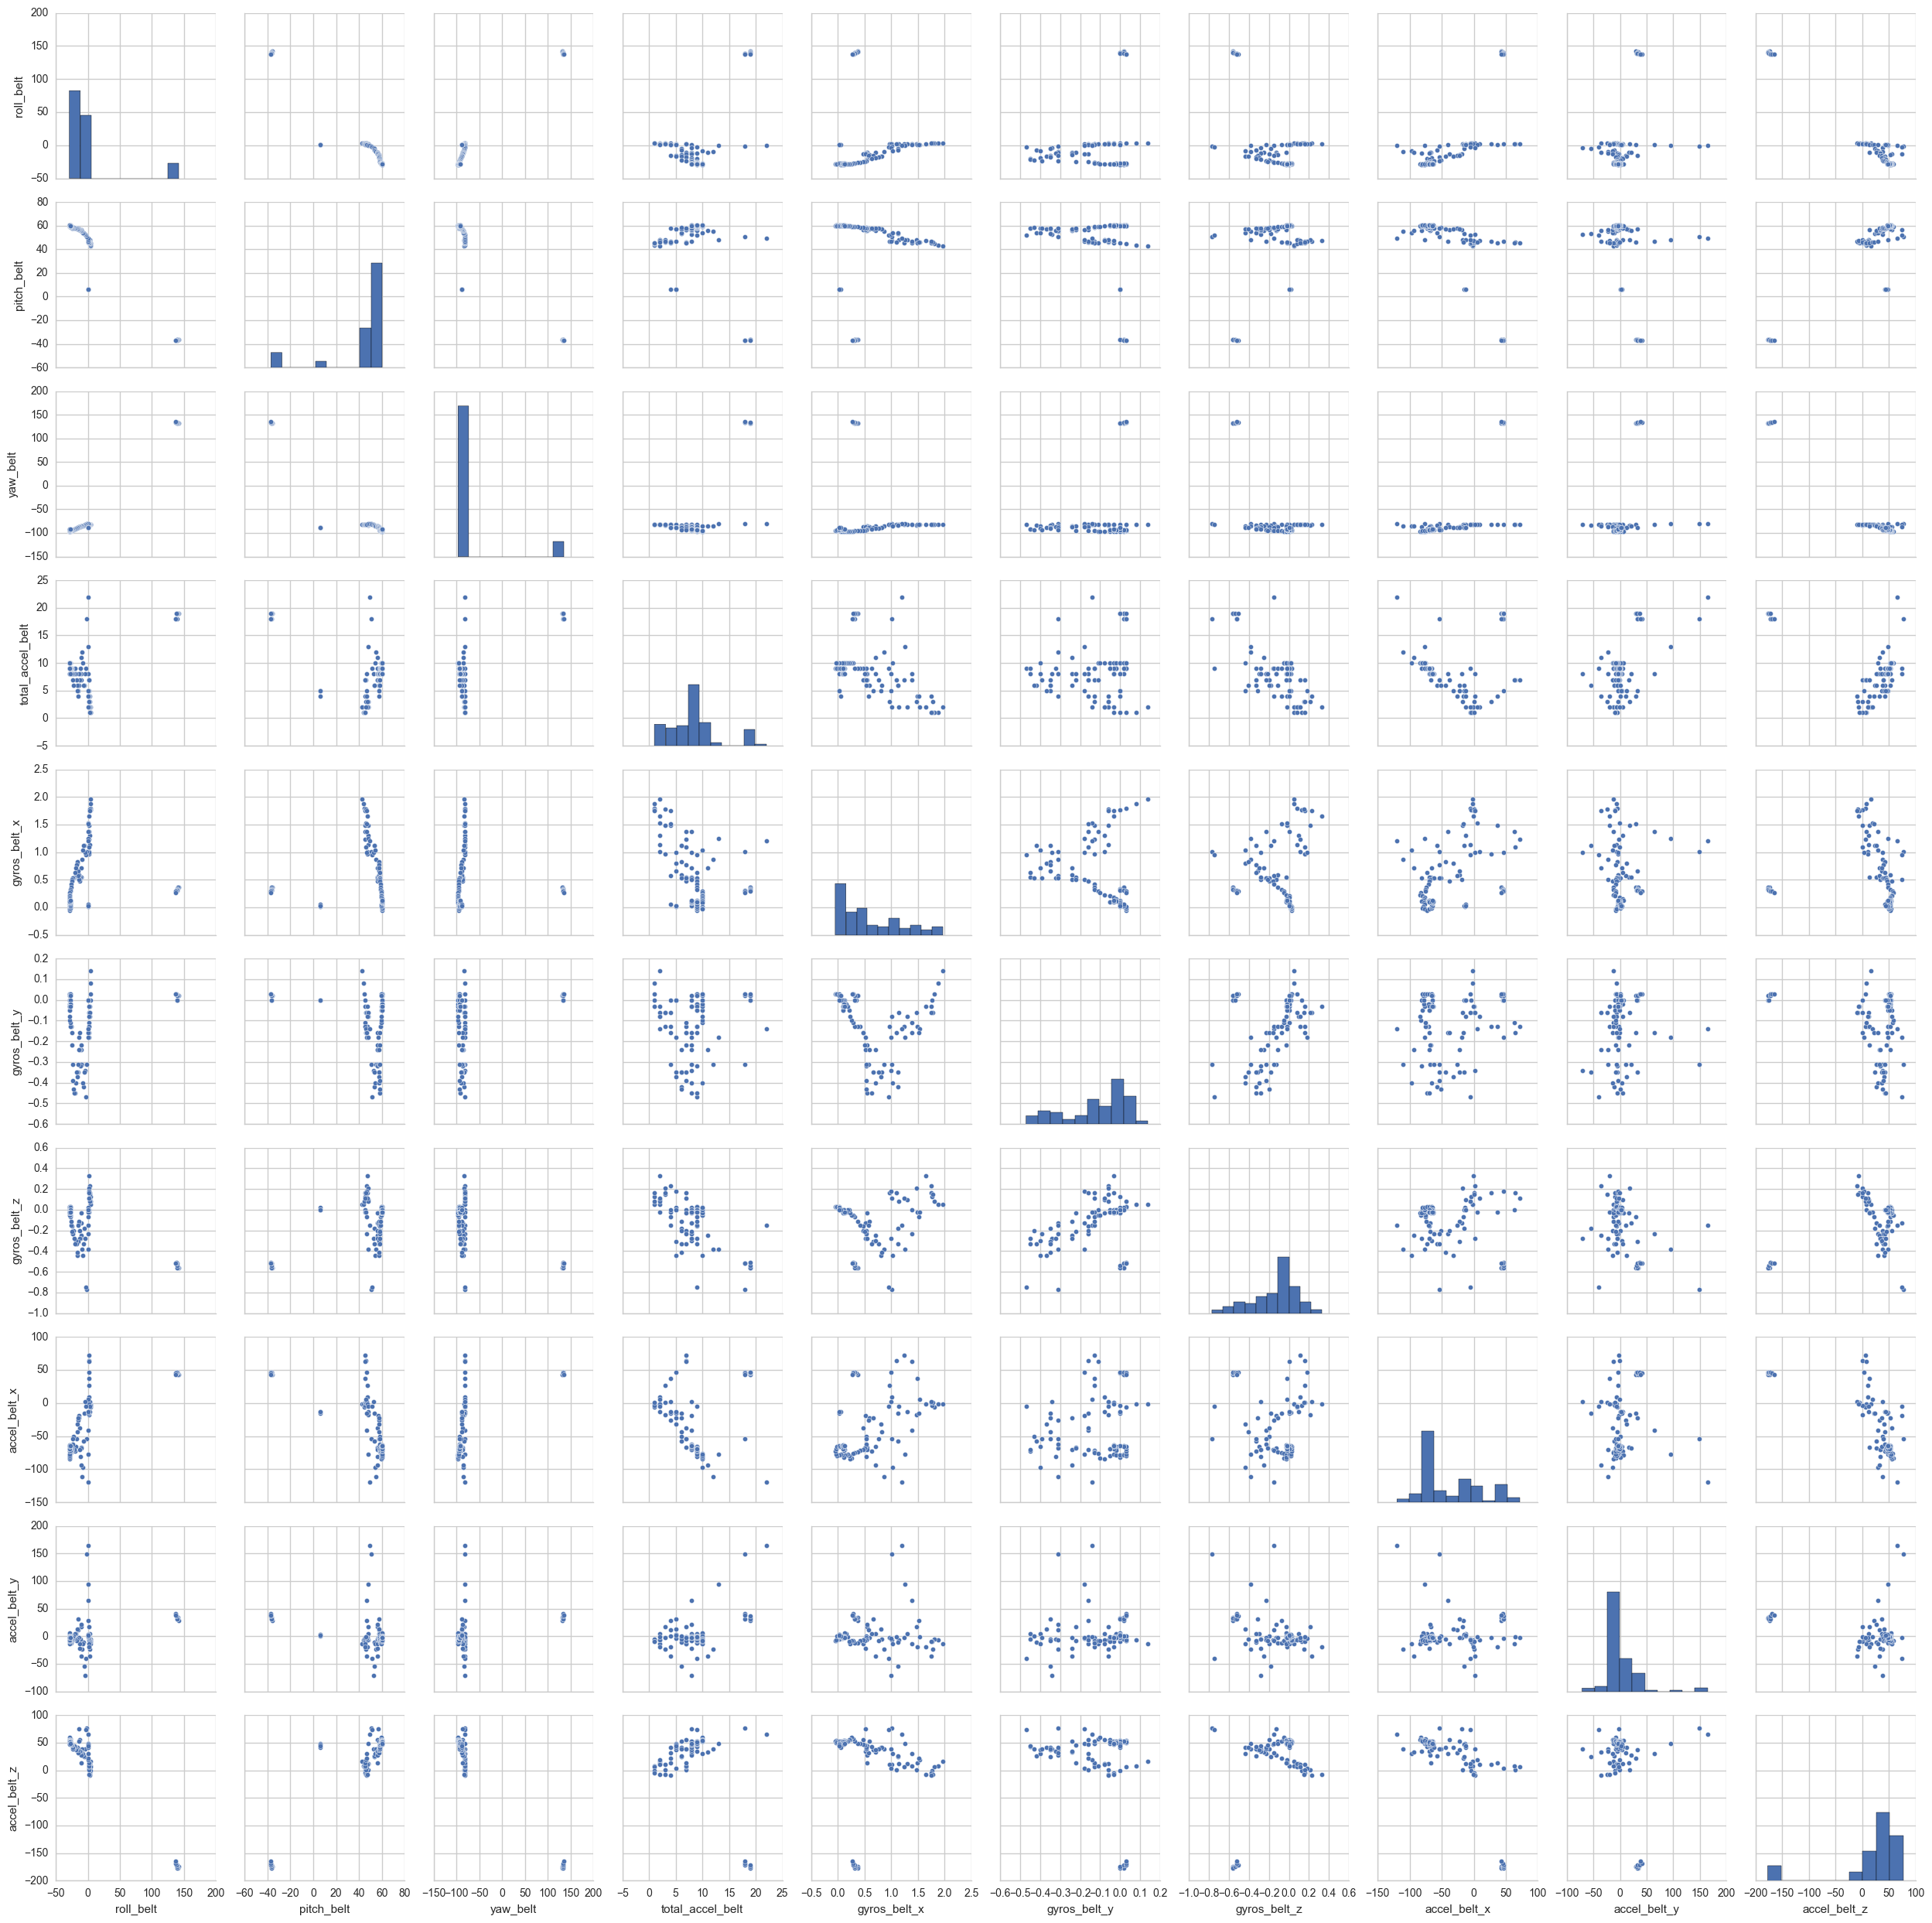

In [28]:
sns.pairplot(df_sample,size=2.5)

In [30]:
df.columns

Index([u'roll_belt', u'pitch_belt', u'yaw_belt', u'total_accel_belt',
       u'gyros_belt_x', u'gyros_belt_y', u'gyros_belt_z', u'accel_belt_x',
       u'accel_belt_y', u'accel_belt_z', u'magnet_belt_x', u'magnet_belt_y',
       u'magnet_belt_z', u'roll_arm', u'pitch_arm', u'yaw_arm',
       u'total_accel_arm', u'gyros_arm_x', u'gyros_arm_y', u'gyros_arm_z',
       u'accel_arm_x', u'accel_arm_y', u'accel_arm_z', u'magnet_arm_x',
       u'magnet_arm_y', u'magnet_arm_z', u'roll_dumbbell', u'pitch_dumbbell',
       u'yaw_dumbbell', u'total_accel_dumbbell', u'gyros_dumbbell_x',
       u'gyros_dumbbell_y', u'gyros_dumbbell_z', u'accel_dumbbell_x',
       u'accel_dumbbell_y', u'accel_dumbbell_z', u'magnet_dumbbell_x',
       u'magnet_dumbbell_y', u'magnet_dumbbell_z', u'roll_forearm',
       u'pitch_forearm', u'yaw_forearm', u'total_accel_forearm',
       u'gyros_forearm_x', u'gyros_forearm_y', u'gyros_forearm_z',
       u'accel_forearm_x', u'accel_forearm_y', u'accel_forearm_z',
       u'ma